In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train = pd.read_csv('/content/drive/My Drive/sc4000/train.csv')
df_test = pd.read_csv('/content/drive/My Drive/sc4000/test.csv')

# Shape of our dataset
print("Shape of our dataset")
print(df_train.shape)
print(df_test.shape)

print()
df_train.head(10).T

Shape of our dataset
(1235, 29)
(824, 28)



,0,1,2,3,4,5,6,7,8,9
id,0,1,2,3,4,5,6,7,8,9
surgery,yes,yes,yes,yes,no,no,yes,no,no,yes
age,adult,adult,adult,adult,adult,adult,adult,adult,adult,adult
hospital_number,530001,533836,529812,5262541,5299629,529642,534787,529461,528742,529640
rectal_temp,38.1,37.5,38.3,37.1,38.0,38.1,38.3,39.2,37.4,38.3
pulse,132.0,88.0,120.0,72.0,52.0,56.0,36.0,114.0,48.0,129.0
respiratory_rate,24.0,12.0,28.0,30.0,48.0,32.0,16.0,24.0,12.0,48.0
temp_of_extremities,cool,cool,cool,cold,normal,normal,cool,cool,cool,cool
peripheral_pulse,reduced,normal,reduced,reduced,normal,normal,reduced,reduced,reduced,reduced
mucous_membrane,dark_cyanotic,pale_cyanotic,pale_pink,pale_pink,normal_pink,bright_pink,normal_pink,pale_cyanotic,normal_pink,pale_pink


In [ ]:
# Fill missing categorical values with mode
categorical_cols = df_train.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_train[col] = df_train[col].fillna(df_train[col].mode()[0])

# Check for any remaining missing values
missing_values_after = df_train[categorical_cols].isna().sum()
print("Missing values after filling:\n", missing_values_after)

# Fill missing categorical values with mode
categorical_cols = df_test.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_test[col] = df_test[col].fillna(df_train[col].mode()[0])

# Check for any remaining missing values
missing_values_after = df_test[categorical_cols].isna().sum()
print("Missing values after filling:\n", missing_values_after)

df_test.isna().sum()

df_train.isna().sum()

Missing values after filling:
 surgery                  0
age                      0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
abdomo_appearance        0
surgical_lesion          0
cp_data                  0
outcome                  0
dtype: int64
Missing values after filling:
 surgery                  0
age                      0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
abdomo_appearance        0
surgical_lesion          0
cp_data                  0
dtype: int64


,0
id,0
surgery,0
age,0
hospital_number,0
rectal_temp,0
pulse,0
respiratory_rate,0
temp_of_extremities,0
peripheral_pulse,0
mucous_membrane,0


In [ ]:
df

NameError: name 'df' is not defined

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

def preprocess_categorical_features(df, ordinal_features, nominal_features, rare_categories_dict, columns_to_drop):
    """
    Preprocesses all categorical features in the dataset:
    - Groups rare categories into 'others'.
    - Applies ordinal encoding for ordered features.
    - Applies one-hot encoding for nominal features.
    - Drops specified columns after preprocessing.

    Parameters:
    - df: The combined DataFrame (train + test) to preprocess.
    - ordinal_features: List of ordinal features for ordinal encoding.
    - nominal_features: List of nominal features for one-hot encoding.
    - rare_categories_dict: Dictionary specifying rare categories for each column.
    - columns_to_drop: List of columns to drop after preprocessing.

    Returns:
    - Processed combined DataFrame.
    """
    # 1. Handle rare categories
    for col, rare_categories in rare_categories_dict.items():
        df[col] = df[col].apply(lambda x: 'others' if x in rare_categories else x)

    # 2. Ordinal Encoding
    for col in ordinal_features:
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col].astype(str))  # Convert to string if needed

    # 3. One-Hot Encoding
    df = pd.get_dummies(df, columns=nominal_features, drop_first=True)

    # 4. Drop specified columns
    df = df.drop(columns=columns_to_drop, axis=1)

    return df

# Combine train and test datasets
df_train['is_train'] = 1  # Add a column to distinguish train from test
df_test['is_train'] = 0   # Add a column to distinguish train from test
combined = pd.concat([df_train, df_test], axis=0)

# Define the features to process
ordinal_features = [
    'pain', 'capillary_refill_time', 'abdominal_distention', 'peripheral_pulse',
    'temp_of_extremities', 'nasogastric_tube'  # Add any features with order
]

nominal_features = [
    'surgery', 'age', 'mucous_membrane', 'peristalsis',
    'nasogastric_reflux', 'rectal_exam_feces', 'abdomen',
    'abdomo_appearance', 'surgical_lesion', 'cp_data',  # Features without order
]

# Define rare categories for specified columns
rare_categories_dict = {
    'abdominal_distention': ['severe'],          # Group 'severe' as "others"
    'nasogastric_reflux': ['slight'],            # Group 'slight' as "others"
    'rectal_exam_feces': ['serosanguinous'],     # Group rare categories
    'abdomen': ['firm'],                         # Rare category in 'abdomen'
    # Add additional rare categories for other columns if necessary
}

# Define columns to drop
columns_to_drop = ['id', 'hospital_number', 'lesion_2', 'lesion_3', 'is_train']

# Preprocess combined dataset
combined_processed = preprocess_categorical_features(combined, ordinal_features, nominal_features, rare_categories_dict, columns_to_drop)

# Split combined dataset back into train and test
train_processed = combined_processed[combined['is_train'] == 1]
test_processed = combined_processed[combined['is_train'] == 0]

# Verify the processed data
print(train_processed.head())
print(test_processed.head())

   rectal_temp  pulse  respiratory_rate  temp_of_extremities  \
0         38.1  132.0              24.0                    1   
1         37.5   88.0              12.0                    1   
2         38.3  120.0              28.0                    1   
3         37.1   72.0              30.0                    0   
4         38.0   52.0              48.0                    2   

   peripheral_pulse  capillary_refill_time  pain  abdominal_distention  \
0                 3                      2     1                     3   
1                 2                      2     3                     0   
2                 3                      1     2                     0   
3                 3                      2     3                     0   
4                 2                      1     0                     1   

   nasogastric_tube  nasogastric_reflux_ph  ...  rectal_exam_feces_normal  \
0                 2                    6.5  ...                     False   
1               

In [ ]:
print(train_processed)


      rectal_temp  pulse  respiratory_rate  temp_of_extremities  \
0            38.1  132.0              24.0                    1   
1            37.5   88.0              12.0                    1   
2            38.3  120.0              28.0                    1   
3            37.1   72.0              30.0                    0   
4            38.0   52.0              48.0                    2   
...           ...    ...               ...                  ...   
1230         38.5  129.0              48.0                    1   
1231         37.5   60.0              50.0                    1   
1232         37.5   84.0              40.0                    2   
1233         38.1   70.0              16.0                    2   
1234         38.1   54.0              36.0                    2   

      peripheral_pulse  capillary_refill_time  pain  abdominal_distention  \
0                    3                      2     1                     3   
1                    2                   

#f1 score count

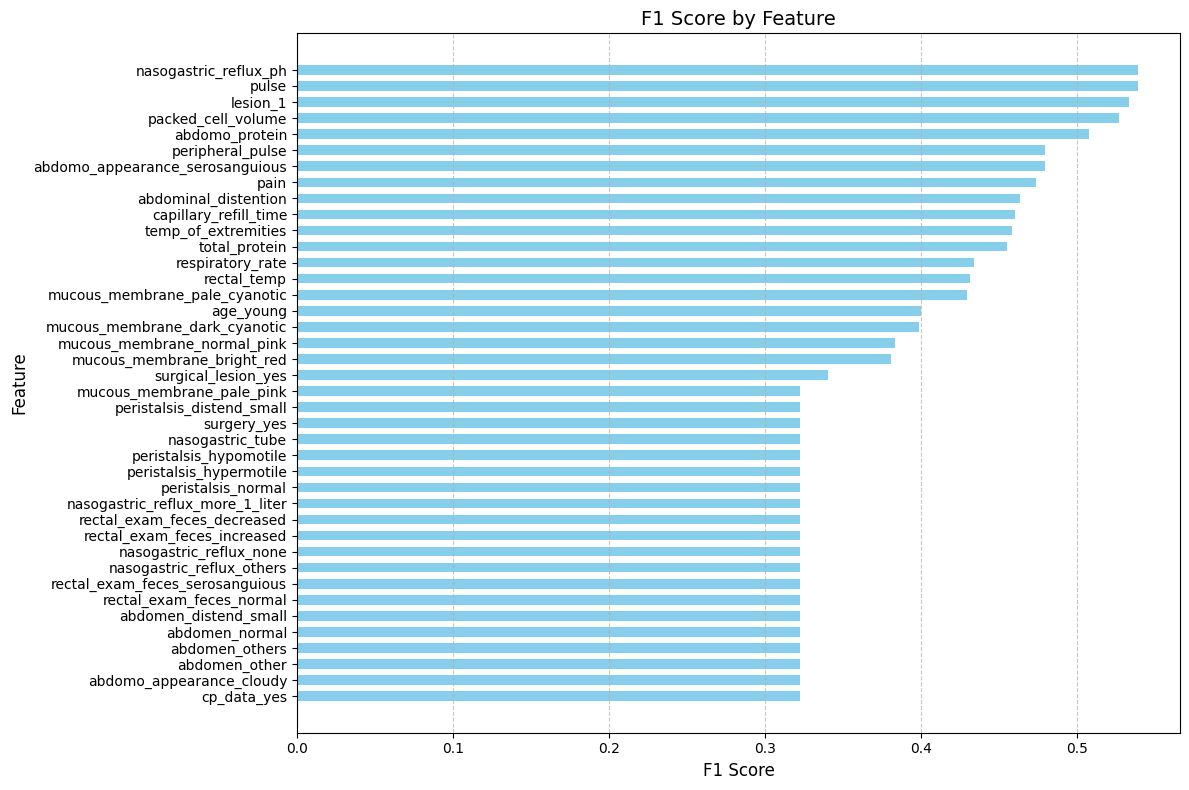

In [ ]:
plt.figure(figsize=(12, 8))

# Plot the F1 scores with spacing between features
plt.barh(
    f1_scores_df['Feature'],
    f1_scores_df['F1 Score'],
    color='skyblue',
    height=0.6  # Reduces the bar height for more space
)

# Add spacing to y-ticks
plt.yticks(
    range(len(f1_scores_df['Feature'])),  # Range for the number of features
    f1_scores_df['Feature'],             # Feature names
    fontsize=10                          # Adjust font size for readability
)

plt.xlabel('F1 Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('F1 Score by Feature', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis for descending order

# Add gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()



Introduction (First Look)


In [ ]:
pip install imbalanced-learn


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target
X = train_processed.drop(columns=['outcome'])  # Features
y = train_processed['outcome']                # Target

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after resampling
print("Class distribution before SMOTE:")
print(y_train.value_counts())
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Class distribution before SMOTE:
outcome
lived         459
died          328
euthanized    201
Name: count, dtype: int64

Class distribution after SMOTE:
outcome
lived         459
euthanized    459
died          459
Name: count, dtype: int64


##Model Trainings


In [ ]:
pip install catboost

#cat


In [ ]:
# Import necessary libraries
from catboost import CatBoostClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class weights (if needed)
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_dict = {i: w for i, w in zip(classes, class_weights)}

# Define the parameter grid to search
param_grid = {
    'iterations': [100, 200, 500, 1000],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'border_count': [32, 64, 128],
    'random_strength': [1, 2, 3, 4, 5],
    'bagging_temperature': [0.1, 0.5, 1, 2, 5],
    'od_type': ['IncToDec', 'Iter'],
    'od_wait': [20, 30, 50],
}

# Initialize the CatBoost model
cat_model = CatBoostClassifier(
    verbose=0,
    random_seed=42,
    class_weights=list(cl4$ass_weights_dict.values())  # Use computed class weights
)

# Initialize RandomizedSearchCV
cat_random = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=param_grid,
    n_iter=50,
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the random search model
cat_random.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", cat_random.best_params_)

# Retrieve the best model (already fitted)
best_cat_model = cat_random.best_estimator_

# CatBoost Evaluation
cat_pred = best_cat_model.predict(X_val)
print("CatBoost Accuracy:", accuracy_score(y_val, cat_pred))

# Evaluation
print("Classification Report:")
print(classification_report(y_val, cat_pred, target_names=[str(label) for label in classes]))



Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'random_strength': 2, 'od_wait': 30, 'od_type': 'Iter', 'learning_rate': 0.05, 'l2_leaf_reg': 1, 'iterations': 500, 'depth': 6, 'border_count': 64, 'bagging_temperature': 0.5}
CatBoost Accuracy: 0.7327935222672065
Classification Report:
              precision    recall  f1-score   support

        died       0.64      0.74      0.68        72
  euthanized       0.74      0.69      0.71        54
       lived       0.80      0.75      0.77       121

    accuracy                           0.73       247
   macro avg       0.73      0.72      0.72       247
weighted avg       0.74      0.73      0.73       247



#SVM


In [ ]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model with default parameters
svc_model = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)
svc_model.fit(X_train, y_train)

# SVM Evaluation
svc_pred = svc_model.predict(X_val)
print("SVM Accuracy:", 0.6917682345624538)

# Detailed classification report
print(classification_report(y_val, svc_pred, target_names=[str(label) for label in np.unique(y)]))





SVM Accuracy: 0.6917682345624538
              precision    recall  f1-score   support

           0       0.47      0.11      0.18        72
           1       0.00      0.00      0.00        54
           2       0.49      0.93      0.64       121

    accuracy                           0.49       247
   macro avg       0.32      0.35      0.27       247
weighted avg       0.38      0.49      0.37       247



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Random Forest Model


In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300, 500, 800, 1200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],  # 'auto' is equivalent to 'sqrt' in RandomForestClassifier
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced']
}
4
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

#Find Optimal Parameters
rf_random = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=50,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the random search model
rf_random.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", rf_random.best_params_)

# Retrieve the best model (already fitted)
best_rf_model = rf_random.best_estimator_

# Random Forest Evaluation
rf_pred = best_rf_model.predict(X_val)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_val, rf_pred))
print(classification_report(y_val, rf_pred, target_names=[str(label) for label in classes]))


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'class_weight': 'balanced', 'bootstrap': True}
Random Forest Accuracy: 0.7206477732793523
              precision    recall  f1-score   support

        died       0.60      0.76      0.67        72
  euthanized       0.80      0.67      0.73        54
       lived       0.79      0.72      0.75       121

    accuracy                           0.72       247
   macro avg       0.73      0.72      0.72       247
weighted avg       0.74      0.72      0.72       247



#Gradient Boosting Model

In [ ]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

# Split the data
X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Use stratified cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    cv=cv,                  # Stratified cross-validation
    n_jobs=-1,              # Use all available cores
    verbose=2,
    scoring='accuracy'
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Retrieve the best model
best_gb_model = grid_search.best_estimator_

# Gradient Boosting Evaluation
gb_pred = best_gb_model.predict(X_val)
print("Gradient Boosting Accuracy:", accuracy_score(y_val, gb_pred))
print(classification_report(y_val, gb_pred, target_names=class_names))






Fitting 3 folds for each of 648 candidates, totalling 1944 fits


KeyboardInterrupt: 

XG BOOST

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.7 MB/s eta 0:00:00


In [ ]:
import xgboost
print(xgboost.__version__)


2.1.2


In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import optuna
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Ensure no missing values in features
X_train_resampled.fillna(0, inplace=True)
X_val.fillna(0, inplace=True)

# Define the objective function for Optuna
def objective_xg(trial):
    """Define the objective function"""
    params = {
        'booster': trial.suggest_categorical('booster', ['gbtree']),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.05, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 300, 700),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0, log=True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 0.5, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True),
        'eval_metric': 'mlogloss',  # Multiclass evaluation metric
    }
    model_xgb = XGBClassifier(**params)
    model_xgb.fit(X_train_resampled, y_train_resampled)  # Train on resampled data
    y_pred = model_xgb.predict(X_val)  # Evaluate on validation set
    return accuracy_score(y_val, y_pred)

# Perform Optuna optimization
study_xgb = optuna.create_study(direction='maximize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_xgb.optimize(objective_xg, n_trials=50, show_progress_bar=True)

# Train the final model on the resampled training data
xgb = XGBClassifier(**study_xgb.best_params)
xgb.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate on the validation set
y_pred = xgb.predict(X_val)

# Decode predictions back to original labels
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_val_decoded = label_encoder.inverse_transform(y_val)

# Print accuracy
print('XGBoost Accuracy:', accuracy_score(y_val_decoded, y_pred_decoded))

# Print classification report
print(classification_report(y_val_decoded, y_pred_decoded, target_names=label_encoder.classes_))






  0%|          | 0/50 [00:00<?, ?it/s]

XGBoost Accuracy: 0.7165991902834008
              precision    recall  f1-score   support

        died       0.68      0.76      0.72        82
  euthanized       0.68      0.64      0.66        50
       lived       0.76      0.72      0.74       115

    accuracy                           0.72       247
   macro avg       0.71      0.71      0.71       247
weighted avg       0.72      0.72      0.72       247



In [ ]:
print('XGBoost Accuracy: ', accuracy_score(y_val, y_pred))
print("Random Forest Accuracy:", accuracy_score(y_val, rf_pred))
print("SVM Accuracy:", 0.6917682345624538)
print("CatBoost Accuracy:", accuracy_score(y_val, cat_pred))


XGBoost Accuracy:  0.7530364372469636
Random Forest Accuracy: 0.6923076923076923
SVM Accuracy: 0.6917682345624538
CatBoost Accuracy: 0.7165991902834008


#Voting Emsemble

In [ ]:
from sklearn.ensemble import VotingClassifier

# Initialize the Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('cat', best_cat_model),
        ('xgb', xgb),
        ('rf', best_rf_model)
    ],
    voting='hard'  # Use 'soft' for probability-based voting
)

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Evaluate the Voting Classifier
voting_pred = voting_clf.predict(X_val)
print("Voting Classifier Accuracy:", accuracy_score(y_val, voting_pred))



ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (3, 247) + inhomogeneous part.

#Stacking Emsemble

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Initialize the Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('cat', best_cat_model),
        ('xgb', xgb),
        ('rf', best_rf_model)
    ],
    final_estimator=LogisticRegression(),
    cv=5
)

# Train the Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Evaluate the Stacking Classifier
stacking_pred = stacking_clf.predict(X_val)
print("Stacking Classifier Accuracy:", accuracy_score(y_val, stacking_pred))



Stacking Classifier Accuracy: 0.757085020242915


In [ ]:
# Ensure test_processed is preprocessed properly
print(test_processed.dtypes)  # Check data types
print(test_processed.head())  # Verify the structure


rectal_temp                        float64
pulse                              float64
respiratory_rate                   float64
temp_of_extremities                  int64
peripheral_pulse                     int64
capillary_refill_time                int64
pain                                 int64
abdominal_distention                 int64
nasogastric_tube                     int64
nasogastric_reflux_ph              float64
packed_cell_volume                 float64
total_protein                      float64
abdomo_protein                     float64
lesion_1                             int64
outcome                             object
surgery_yes                           bool
age_young                             bool
mucous_membrane_bright_red            bool
mucous_membrane_dark_cyanotic         bool
mucous_membrane_normal_pink           bool
mucous_membrane_pale_cyanotic         bool
mucous_membrane_pale_pink             bool
peristalsis_distend_small             bool
peristalsis

#Printing csv file


In [ ]:
# Ensure 'id' column exists and starts from 1235
df_test['id'] = range(1235, 1235 + len(df_test))

# Drop the 'outcome' column from the test data if it exists
test_processed = test_processed.drop(columns=['outcome'], errors='ignore')

# Make predictions on the test data using the trained XGBoost model
test_predictions = xgb.predict(test_processed)

# Decode predictions back to original labels
test_predictions_labels = label_encoder.inverse_transform(test_predictions)

# Create a DataFrame for submission
submission = pd.DataFrame({
    'id': df_test['id'],            # Use the 'id' column from df_test
    'outcome': test_predictions_labels
})

# Save to CSV
submission.to_csv('final_predictions.csv', index=False)
print("Predictions saved to 'final_predictions.csv'.")




Predictions saved to 'final_predictions.csv'.


<ipython-input-40-9d0b0013324f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['id'] = range(1235, 1235 + len(df_test))
